In [1]:
x, t1, t2, gamma, kappa = var('x t1 t2 gamma kappa')
h(x) = -x*log(x, 2) - (1-x)*log(1-x, 2)
# Trade-off functions for S
g1(x) = 1 - h(x/(2*(1-gamma)*kappa))
dg1 = g1.derivative()
f0 = g1 # p(1) >= pt(1)
f1 = g1(t1) + dg1(t1)[0]*(t1 - x) # p(1) < pt(1)

# Tradeoff functions for J3
g2(x) = 1 - h(3-4*x/gamma)
dg2 = g2.derivative()
f2 = g2
f3 = g2(t2) + dg2(t2)[0]*(x - t2)

In [2]:
n = var('n')
eps_ec = var('eps_ec', latex_name="\\epsilon_{EC}")
eps_s_qkd = var('eps_s_qkd', latex_name="\\epsilon^s_{QKD}")
eps_c_qkd = var('eps_c_qkd', latex_name="\\epsilon^c_{QKD}")
delta_est = var('delta_est')

eta_opt_J3 = var('eta_opt_J3')
eta_opt_S = var('eta_opt_S')

J_3 = var('J_3')
S = var('S')
Q = var('Q')
S = Q/2
J_3 = 3/4*Q - 1/8

#eps_c_ec = eps'_ec + eps_ec
test_prob = gamma + kappa*(1-gamma)
leak_ec = n*( (1-test_prob)*h(Q) + gamma*h(2/3 - 2/3*J_3) + kappa*(1-gamma)*h(S) ) \
        + sqrt(n)*4*log(2*sqrt(2)+1,2)*sqrt(2*log(8/(eps_c_qkd - eps_ec)^2,2))\
            + log(8/(eps_c_qkd - eps_ec)^2 + 2/(2-(eps_c_qkd - eps_ec)),2) + log(1/eps_ec,2)
show("leak_ec: ", leak_ec)

l = n/2*(eta_opt_J3 + eta_opt_S) - leak_ec - 3*log(1-sqrt(1-(eps_s_qkd/4)^2), 2) \
                   - (gamma + kappa*(1-gamma))*n - sqrt(n)*2*log(7, 2)*sqrt(1-2*log(eps_s_qkd/4*(eps_ec + eps_s_qkd),2)) - 2*log(1/eps_s_qkd,2)

show("l: ", l)

'leak_ec: ' 1/4*(2*(gamma - 1)*kappa*(Q*log(1/2*Q)/log(2) - (Q - 2)*log(-1/2*Q + 1)/log(2)) - 4*((gamma - 1)*kappa - gamma + 1)*(Q*log(Q)/log(2) - (Q - 1)*log(-Q + 1)/log(2)) - gamma*((2*Q + 1)*log(1/2*Q + 1/4)/log(2) - (2*Q - 3)*log(-1/2*Q + 3/4)/log(2)))*n + 4*sqrt(2)*sqrt(n)*sqrt(log(8/(eps_c_qkd - eps_ec)^2)/log(2))*log(2*sqrt(2) + 1)/log(2) + log(-2/(eps_c_qkd - eps_ec - 2) + 8/(eps_c_qkd - eps_ec)^2)/log(2) + log(1/eps_ec)/log(2)

'l: ' -1/4*(2*(gamma - 1)*kappa*(Q*log(1/2*Q)/log(2) - (Q - 2)*log(-1/2*Q + 1)/log(2)) - 4*((gamma - 1)*kappa - gamma + 1)*(Q*log(Q)/log(2) - (Q - 1)*log(-Q + 1)/log(2)) - gamma*((2*Q + 1)*log(1/2*Q + 1/4)/log(2) - (2*Q - 3)*log(-1/2*Q + 3/4)/log(2)))*n + ((gamma - 1)*kappa - gamma)*n + 1/2*(eta_opt_J3 + eta_opt_S)*n - 4*sqrt(2)*sqrt(n)*sqrt(log(8/(eps_c_qkd - eps_ec)^2)/log(2))*log(2*sqrt(2) + 1)/log(2) - 2*sqrt(n)*sqrt(-2*log(1/4*(eps_ec + eps_s_qkd)*eps_s_qkd)/log(2) + 1)*log(7)/log(2) - 3*log(-sqrt(-1/16*eps_s_qkd^2 + 1) + 1)/log(2) - log(-2/(eps_c_qkd - eps_ec - 2) + 8/(eps_c_qkd - eps_ec)^2)/log(2) - log(1/eps_ec)/log(2) - 2*log(1/eps_s_qkd)/log(2)

In [12]:
show(solve(eta_S(0, eps_s_qkd/4, eps_ec + eps_s_qkd, n).subs(kappa=kappa0, gamma=gamma0).differentiate(t1), t1))

[t1 == (8916467200000000*sqrt(n)*log(100000000/18827*t1) - 8916467200000000*sqrt(n)*log(-100000000/18827*t1 + 1) + 4458233600000000*sqrt(n) - sqrt((79503387328675840000000000000000*n*log(2)*log(100000000/18827*t1)^2 + 79503387328675840000000000000000*n*log(2)*log(-100000000/18827*t1 + 1)^2 + 19875846832168960000000000000000*n*log(2) - 715555409267200000000*sqrt(n)*sqrt((log(2) - 2*log(1/4*eps_ec*eps_s_qkd + 1/4*eps_s_qkd^2))/log(2))*log(2) + 17832934400000000*(4458233600000000*n*log(2) - 94719999999999919749*sqrt(n)*sqrt((log(2) - 2*log(1/4*eps_ec*eps_s_qkd + 1/4*eps_s_qkd^2))/log(2))*log(2))*log(100000000/18827*t1) - 17832934400000000*(8916467200000000*n*log(2)*log(100000000/18827*t1) + 4458233600000000*n*log(2) - 94719999999999919749*sqrt(n)*sqrt((log(2) - 2*log(1/4*eps_ec*eps_s_qkd + 1/4*eps_s_qkd^2))/log(2))*log(2))*log(-100000000/18827*t1 + 1) + 6440223001*log(2) - 12880446002*log(1/4*eps_ec*eps_s_qkd + 1/4*eps_s_qkd^2))/log(2)) + 80251*sqrt((log(2) - 2*log(1/4*eps_ec*eps_s_qkd + 1/4*eps_s_qkd^2))/log(2)))/(94720000000000000000*sqrt(n)*log(100000000/18827*t1) - 94720000000000000000*sqrt(n)*log(-100000000/18827*t1 + 1) + 80251*sqrt(n)), t1 == (8916467200000000*sqrt(n)*log(100000000/18827*t1) - 8916467200000000*sqrt(n)*log(-100000000/18827*t1 + 1) + 4458233600000000*sqrt(n) + sqrt((79503387328675840000000000000000*n*log(2)*log(100000000/18827*t1)^2 + 79503387328675840000000000000000*n*log(2)*log(-100000000/18827*t1 + 1)^2 + 19875846832168960000000000000000*n*log(2) - 715555409267200000000*sqrt(n)*sqrt((log(2) - 2*log(1/4*eps_ec*eps_s_qkd + 1/4*eps_s_qkd^2))/log(2))*log(2) + 17832934400000000*(4458233600000000*n*log(2) - 94719999999999919749*sqrt(n)*sqrt((log(2) - 2*log(1/4*eps_ec*eps_s_qkd + 1/4*eps_s_qkd^2))/log(2))*log(2))*log(100000000/18827*t1) - 17832934400000000*(8916467200000000*n*log(2)*log(100000000/18827*t1) + 4458233600000000*n*log(2) - 94719999999999919749*sqrt(n)*sqrt((log(2) - 2*log(1/4*eps_ec*eps_s_qkd + 1/4*eps_s_qkd^2))/log(2))*log(2))*log(-100000000/18827*t1 + 1) + 6440223001*log(2) - 12880446002*log(1/4*eps_ec*eps_s_qkd + 1/4*eps_s_qkd^2))/log(2)) + 80251*sqrt((log(2) - 2*log(1/4*eps_ec*eps_s_qkd + 1/4*eps_s_qkd^2))/log(2)))/(94720000000000000000*sqrt(n)*log(100000000/18827*t1) - 94720000000000000000*sqrt(n)*log(-100000000/18827*t1 + 1) + 80251*sqrt(n))]

-1/100000000*sqrt(10)*(4*log(3)/log(2) + 10623.0413767462*log(5311.52068837308*t1)/log(2) - 10623.0413767462*log(-5311.52068837308*t1 + 1)/log(2))*sqrt(-2*log(100001/4000000000000000)/log(2) + 1) + 1/2*t1*(10623.0413767462*log(5311.52068837308*t1)/log(2) - 10623.0413767462*log(-5311.52068837308*t1 + 1)/log(2)) + 5311.52068837308*t1*log(5311.52068837308*t1)/log(2) + 1/2*(-10623.0413767462*t1 + 2)*log(-5311.52068837308*t1 + 1)/log(2) + 1

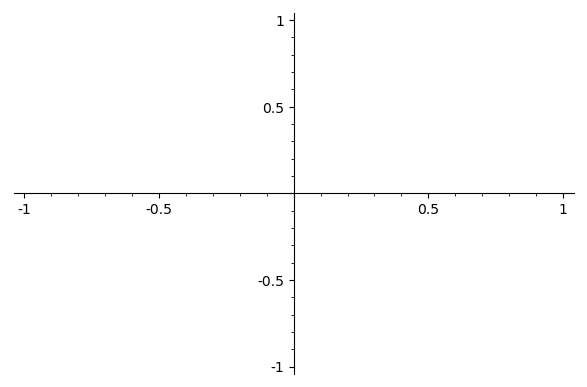

In [7]:
p0, p1, p2 = var('p0 p1 p2', domain="real")

eta_J3 = lambda x_0, eps_s, eps_2, n: f3(x=x_0) - 1/sqrt(n)*2*(log(9,2) + dg2(x=t2)[0])*sqrt(1 - 2*log(eps_s*eps_2,2))
eta_S = lambda x_0, eps_s, eps_2, n: f1(x=x_0) - 1/sqrt(n)*2*(log(9,2) + dg1(x=t1)[0])*sqrt(1 - 2*log(eps_s*eps_2,2))

L2 = []
gamma0=2*(p0*p1 + p0*p2 + p1*p2).subs(p0=0.97, p1=0.015, p2=0.015)
kappa0 = 10^-4
n0=10^15
for k in range(0, 21):
    Q_val = k*0.07/20
    x_0_j = (gamma*(2/3 - 2/3*J_3) - 10^-3).subs(Q=Q_val)
    x_0_s = (kappa*(1-gamma)*S).subs(Q=Q_val)
    eta_val_J3 = (eta_J3(x_0_j, eps_s_qkd/4, eps_ec + eps_s_qkd, n)).subs(n=n0) \
                                                        .subs(eps_ec=10^-10) \
                                                        .subs(eps_c_qkd=10^-2) \
                                                        .subs(eps_s_qkd=10^-5) \
                                                        .subs(gamma=gamma0)
    eta_val_S = (eta_S(x_0_s, eps_s_qkd/4, eps_ec + eps_s_qkd, n)).subs(n=n0) \
                                                        .subs(eps_ec=10^-10) \
                                                        .subs(eps_c_qkd=10^-2) \
                                                        .subs(eps_s_qkd=10^-5) \
                                                        .subs(gamma=gamma0) \
                                                        .subs(kappa=kappa0)
    
    t_j = solve(eta_val_J3.derivative(t2)==0,t2)[0].rhs()
    t_s = solve(eta_val_S.derivative(t1)==0,t1)[0].rhs()
    show(eta_val_S)
    break
    l_n_val = (l/n).subs(gamma = gamma0) \
                        .subs(Q = Q_val) \
                        .subs(n=n0) \
                        .subs(eps_c_qkd=10^-2) \
                        .subs(eps_s_qkd=10^-5) \
                        .subs(eps_ec=10^-10) \
                        .subs(eta_opt_J3 = eta_val_J3.subs(t2=t_j)) \
                        .subs(eta_opt_S = eta_val_S.subs(t1=t_s)) \
                        .subs(kappa=kappa0)
    
    show(l_n_val)
    break
    L2.append((Q_val, N(l_n_val)))
    
plot_q = list_plot(L2, plotjoined=True)
show(plot_q)